In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import multi_gpu_model, plot_model
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
print('Tensorflow version =', tf.__version__)

Tensorflow version = 2.0.0-alpha0


## Creating data generators
 - Random rotations applied to augment data

In [10]:
train_data_dir = 'dataset/Training'
validation_data_dir = 'dataset/Validation'
batch_size = 32
img_height, img_width = 100, 100

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30)
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(
    img_height, img_width), batch_size=batch_size, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(
    img_height, img_width), batch_size=batch_size, class_mode='binary')

class_map = train_generator.class_indices

Found 100000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


## Visualizing some images
 - The dataset containes 50000 benign images and 50000 positive cancer images
 - Our task here is to classify a image as 'benign' / 'cancer' given a image

W0404 23:06:34.105147 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 23:06:34.115253 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 23:06:34.124379 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 23:06:34.174127 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 23:06:34.181427 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 23:06:34.189236 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0404 23:06:34.197521 140539

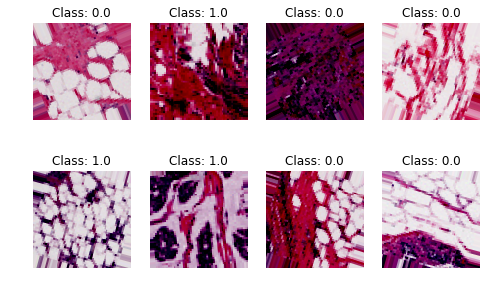

In [3]:
plt.subplots(2, 4, figsize=(8, 5))
disp_images, labels = train_generator.__getitem__(1)
for i, idx in enumerate(disp_images[:8]):
    plt.subplot(2, 4, i+1)
    plt.title(f'Class: {labels[i]}')
    plt.axis('off')
    plt.imshow(disp_images[i])

## Building the model
 - We select the pretrained InceptionV3 model available in keras applications package
 - The last layers is removed and a new fully connected layers is added with units=num_classes (here 2)


In [4]:
base_model = InceptionV3(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False, pooling='avg')
x = base_model.output
predictions = Dense(1, activation='sigmoid')(x)
model = Model(base_model.input, predictions)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=3e-4), metrics=['accuracy'])

## Creating call back objects to help us visualize training and do some trivial tasks like checkpointing, early stopping and training

In [6]:
tensorboard = TensorBoard(
    log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='batch')
callbacks_list = [ModelCheckpoint('model_weights.h5', monitor='val_accuracy', verbose=1, save_best_only=True),
                  tensorboard, EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)]

## Training the model

In [7]:
model.fit_generator(train_generator, 
                    epochs=10, 
                    validation_data=validation_generator, 
                    callbacks=callbacks_list, 
                    workers=8, 
                    max_queue_size=300)

Epoch 1/10
3124/3125 [============================>.] - ETA: 0s - loss: 0.3952 - accuracy: 0.8319
Epoch 00001: val_accuracy improved from -inf to 0.84410, saving model to model_weights.h5
3125/3125 [==============================] - 432s 138ms/step - loss: 0.3951 - accuracy: 0.8320 - val_loss: 0.4300 - val_accuracy: 0.8441
Epoch 2/10
3124/3125 [============================>.] - ETA: 0s - loss: 0.3405 - accuracy: 0.8604
Epoch 00002: val_accuracy did not improve from 0.84410
3125/3125 [==============================] - 381s 122ms/step - loss: 0.3404 - accuracy: 0.8604 - val_loss: 0.6176 - val_accuracy: 0.8256
Epoch 3/10
3124/3125 [============================>.] - ETA: 0s - loss: 0.3365 - accuracy: 0.8631
Epoch 00003: val_accuracy improved from 0.84410 to 0.86950, saving model to model_weights.h5
3125/3125 [==============================] - 391s 125ms/step - loss: 0.3365 - accuracy: 0.8631 - val_loss: 0.6131 - val_accuracy: 0.8695
Epoch 4/10
3124/3125 [============================>.] - E

## Loading the best weights to perform inference

In [8]:
model.load_weights('model_weights.h5')

# Inference loop


W0405 00:28:03.669064 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0405 00:28:03.694274 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0405 00:28:03.719378 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0405 00:28:03.745065 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0405 00:28:03.770052 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0405 00:28:03.795549 140539969984320 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0405 00:28:03.820536 140539

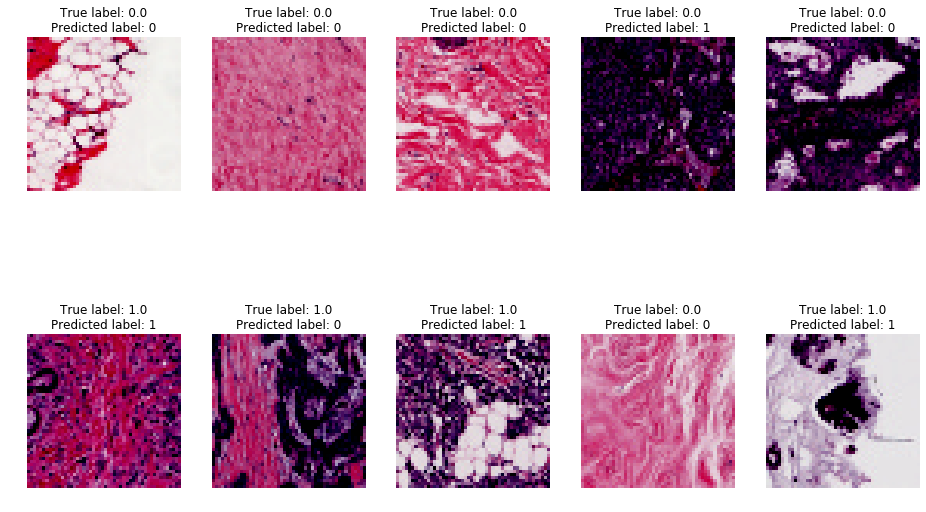

In [18]:
plt.subplots(2, 5, figsize=(16, 10))
test_images, labels = validation_generator.__getitem__(1)
for i, idx in enumerate(test_images[:10]):
    img = test_images[i]
    pred_prob = np.squeeze(model.predict(np.expand_dims(img, axis=0)))
    pred = class_map['1'] if pred_prob >= 0.5 else class_map['0'] 
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.title(f'True label: {labels[i]}\nPredicted label: {pred}', wrap=True)
    plt.imshow(test_images[i])